In [30]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
# Load data
data_myky_vacuum = pd.read_csv('data/myky_vacuum.csv')
data_myky_picking = pd.read_csv('data/myky_picking.csv')
data_myky_walking = pd.read_csv('data/myky_walking.csv')

# Label
data_myky_vacuum['Activity'] = 'Vacuum'
data_myky_picking['Activity'] = 'Picking'
data_myky_walking['Activity'] = 'Walking'

In [32]:
# Inspect
data_myky_vacuum.head()

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),...,LOCATION Longitude :,LOCATION Altitude ( m),LOCATION Altitude-google ( m),LOCATION Speed ( Kmh),LOCATION Accuracy ( m),LOCATION ORIENTATION (°),Satellites in range,Time since start in ms,YYYY-MO-DD HH-MI-SS_SSS,Activity
0,-1.7767,2.0458,9.7830,-1.3664,2.3689,9.4176,-0.4322,-0.3349,-0.2438,-0.0590,...,NaN,NaN,NaN,NaN,NaN,NaN,0 / 0,16,2020-12-03 18:37:43:459,Vacuum
1,-2.1390,2.0249,9.2032,-2.1063,2.2908,9.2997,-0.2322,-0.5125,0.4364,0.0107,...,NaN,NaN,NaN,NaN,NaN,NaN,0 / 0,116,2020-12-03 18:37:43:559,Vacuum
2,-3.0378,2.3733,8.8871,-2.7166,2.4259,9.1052,-0.3519,-0.0978,-0.7759,0.0107,...,NaN,NaN,NaN,NaN,NaN,NaN,0 / 0,217,2020-12-03 18:37:43:660,Vacuum
3,-2.5658,2.0652,9.4708,-2.7166,2.4259,9.1052,0.1700,-0.2439,0.5378,-0.4130,...,NaN,NaN,NaN,NaN,NaN,NaN,0 / 0,316,2020-12-03 18:37:43:759,Vacuum
4,-2.5658,2.0652,9.4708,-2.8546,2.4317,9.0613,0.1383,-0.2954,0.4692,-0.0974,...,NaN,NaN,NaN,NaN,NaN,NaN,0 / 0,416,2020-12-03 18:37:43:859,Vacuum


In [33]:
# Put data in one df

dfs = []

for df in [data_myky_vacuum, data_myky_picking, data_myky_walking]:
    
    # Pick columns
    data = df[["ACCELEROMETER X (m/s²)",
                              "ACCELEROMETER Y (m/s²)",
                              "ACCELEROMETER Z (m/s²)",
                              "GYROSCOPE X (rad/s)",
                              "GYROSCOPE Y (rad/s)",
                              "GYROSCOPE Z (rad/s)",
                              "GRAVITY X (m/s²)",
                              "GRAVITY Y (m/s²)",
                              "GRAVITY Z (m/s²)",
                              "Activity"]]
    
    dfs.append(data)

# Put together
data = pd.concat(dfs, axis = 0)

In [34]:
# Inspect so that all three labels are in the data
data['Activity'].drop_duplicates()

0     Vacuum
0    Picking
0    Walking
Name: Activity, dtype: object

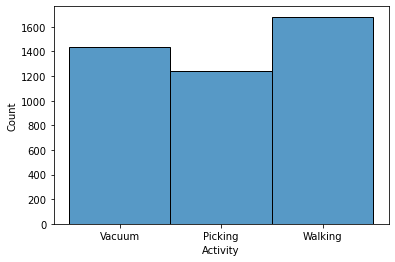

In [35]:
# Check distribution of activities
sns.histplot(x = 'Activity', data = data)

In [36]:
# Separate labels and features
y = data['Activity']
x = data.drop(labels = 'Activity', axis = 1)

y.head()

0    Vacuum
1    Vacuum
2    Vacuum
3    Vacuum
4    Vacuum
Name: Activity, dtype: object

In [37]:
from sklearn.preprocessing import StandardScaler

# Transforming the data
scl = StandardScaler()
x = scl.fit_transform(x)

In [38]:
from sklearn.decomposition import PCA

# Reduce dimensions
pca = PCA(n_components = 0.9, random_state = 42)
x = pca.fit_transform(x)

In [39]:
from sklearn.manifold import TSNE

# Transform
tsne = TSNE(random_state = 42)
x_transformed = tsne.fit_transform(x)

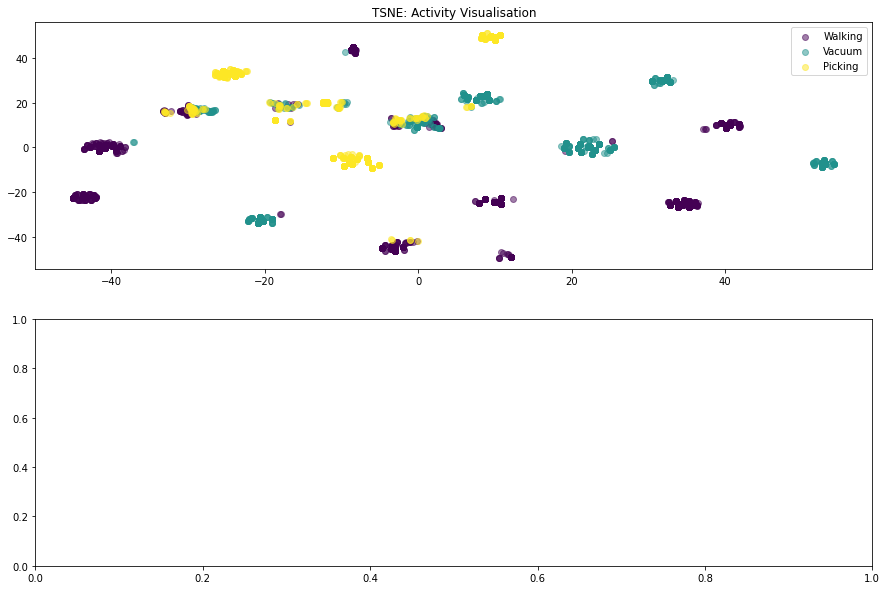

In [40]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex

# Subplot
fig, axarr = plt.subplots(2, 1, figsize =(15, 10))

n = y.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(y.value_counts().index):
    # Mask to separate sets
    mask = (y==group).values
    axarr[0].scatter(x=x_transformed[mask][:,0], y=x_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('TSNE: Activity Visualisation')
axarr[0].legend()